# MNIST dataset

In [134]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scikeras.wrappers import KerasClassifier
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Fetch data and split into training-validation set and test set
mnist = fetch_openml("mnist_784", version = 1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.int8) # converting target to numbers instead of character
X_prevalidsplit, X_test, y_prevalidsplit, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [3]:
# Split set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_prevalidsplit, y_prevalidsplit, random_state=42, test_size=0.2)

In [4]:
# Standardize Xs
scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train)
X_valid_tr = scaler.transform(X_valid)
X_test_tr = scaler.transform(X_test)

# convert targets to one-hot vertors
y_train = tf.keras.utils.to_categorical(y_train)
y_valid = tf.keras.utils.to_categorical(y_valid)
y_test = tf.keras.utils.to_categorical(y_test)

Define neural network model as object to use for hyperparameters tunning (N of hidden layers, N of neurons within layer, regularization, batch size)

In [86]:
# define model generation function
def nn_model(hidden_layers, dropout_rate, batch_norm):
    # build model architecture
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=784)) # input layer
    for l in hidden_layers:
        model.add(tf.keras.layers.Dense(l, activation="relu")) # hidden layers
        if batch_norm == True:
            model.add(tf.keras.layers.BatchNormalization) # optional batch normalization
    model.add(tf.keras.layers.Dropout(dropout_rate)) # dropout layer
    model.add(tf.keras.layers.Dense(10, activation="softmax")) # output layer
    return model

# define callback to implement early stopping in training. Also saving checkpoint at best point in training
stopping_callback = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# define wrapper object
dnn_classifier = KerasClassifier(
    model = nn_model, 
    loss=["categorical_crossentropy"], 
    metrics=["accuracy"],
    optimizer="Adam", 
    callbacks=[stopping_callback],
    optimizer__learning_rate = 0.001, 
    model__hidden_layers = (512,), 
    model__dropout_rate = 0.2, 
    model__batch_norm = False
)

In [87]:
# define hyperparameters space for gridsearch
nn_hyperparameters = {
    "optimizer__learning_rate": [0.0001, 0.0003, 0.001, 0.003], 
    "model__hidden_layers": [(256,256),(256,256,256),(256,256,256,256), 
                             (512,512),(512,512,512),(512,512,512,512)],
    "model__dropout_rate": [0, 0.2], 
    "model__batch_norm": [False, True]
}

# define GridSearchCv object 
grid_search_cv = GridSearchCV(dnn_classifier, nn_hyperparameters, cv = 3, n_jobs=4)

In [88]:
# Run grid search
grid_search_cv.fit(
    X_train_tr, 
    y_train,
    epochs = 50,
    validation_data = (X_valid_tr, y_valid), 
    callbacks = [stopping_callback]
)

2022-06-22 23:24:38.024286: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-22 23:24:38.070465: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-22 23:24:38.118177: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
1000/1000 [==============================] - 8s 7ms/step - loss: 0.5100 - accuracy: 0.8601 - val_loss: 0.2484 - val_accuracy: 0.9280
Epoch 2/50
1000/1000 [==============================] - 8s 7ms/step - loss: 0.5199 - accuracy: 0.8574 - val_loss: 0.2523 - val_accuracy: 0.9302
Epoch 2/50
1000/1000 [==============================] - 8s 7ms/step - loss: 0.3217 - accuracy: 0.9064 - val_loss: 0.1928 - val_accuracy: 0.9488
Epoch 2/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1894 - accuracy: 0.9442 - val_loss: 0.1877 - val_accuracy: 0.9459
Epoch 3/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1909 - accuracy: 0.9448 - val_loss: 0.1944 - val_accuracy: 0.9454
Epoch 3/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1175 - accuracy: 0.9652 - val_loss: 0.1533 - val_accuracy: 0.9575
Epoch 3/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1280 - accuracy: 0.9631 -

1000/1000 [==============================] - 5s 5ms/step - loss: 0.1214 - accuracy: 0.9647 - val_loss: 0.1494 - val_accuracy: 0.9592
Epoch 3/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.1568 - val_accuracy: 0.9656
Epoch 6/50
1000/1000 [==============================] - 7s 6ms/step - loss: 0.2702 - accuracy: 0.9217 - val_loss: 0.1624 - val_accuracy: 0.9527
Epoch 2/50
1000/1000 [==============================] - 7s 6ms/step - loss: 0.2746 - accuracy: 0.9215 - val_loss: 0.2086 - val_accuracy: 0.9454
Epoch 2/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0748 - accuracy: 0.9781 - val_loss: 0.1424 - val_accuracy: 0.9635
Epoch 4/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0205 - accuracy: 0.9947 - val_loss: 0.1539 - val_accuracy: 0.9697
Epoch 7/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1138 - accuracy: 0.9663 - val_loss: 0.1544 - val_accuracy: 0.9567
Epo

1000/1000 [==============================] - 6s 6ms/step - loss: 0.1234 - accuracy: 0.9688 - val_loss: 0.2158 - val_accuracy: 0.9571
Epoch 7/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1214 - accuracy: 0.9687 - val_loss: 0.2441 - val_accuracy: 0.9545
Epoch 6/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1346 - accuracy: 0.9637 - val_loss: 0.2189 - val_accuracy: 0.9473
Epoch 5/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1211 - accuracy: 0.9705 - val_loss: 0.2269 - val_accuracy: 0.9559
Epoch 7/50
1000/1000 [==============================] - 10s 8ms/step - loss: 0.4891 - accuracy: 0.8636 - val_loss: 0.2353 - val_accuracy: 0.9342
Epoch 2/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1016 - accuracy: 0.9755 - val_loss: 0.3674 - val_accuracy: 0.9419
Epoch 9/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1737 - accuracy: 0.9478 - val_loss: 0.1833 - val_accuracy: 0.9502
Ep

1000/1000 [==============================] - 8s 8ms/step - loss: 0.0120 - accuracy: 0.9976 - val_loss: 0.1749 - val_accuracy: 0.9624
Epoch 10/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1134 - accuracy: 0.9660 - val_loss: 0.1538 - val_accuracy: 0.9599
Epoch 3/50
1000/1000 [==============================] - 9s 8ms/step - loss: 0.3186 - accuracy: 0.9093 - val_loss: 0.1661 - val_accuracy: 0.9514
Epoch 2/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1123 - accuracy: 0.9664 - val_loss: 0.1452 - val_accuracy: 0.9576
Epoch 3/50
1000/1000 [==============================] - 8s 6ms/step - loss: 0.2793 - accuracy: 0.9171 - val_loss: 0.1823 - val_accuracy: 0.9496
Epoch 2/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0411 - accuracy: 0.9873 - val_loss: 0.1569 - val_accuracy: 0.9618
Epoch 5/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0669 - accuracy: 0.9803 - val_loss: 0.1343 - val_accuracy: 0.9619
Ep

1000/1000 [==============================] - 7s 7ms/step - loss: 0.1400 - accuracy: 0.9638 - val_loss: 0.2289 - val_accuracy: 0.9470
Epoch 5/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0393 - accuracy: 0.9893 - val_loss: 0.1426 - val_accuracy: 0.9656
Epoch 8/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.1339 - accuracy: 0.9671 - val_loss: 0.2576 - val_accuracy: 0.9503
Epoch 6/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.1279 - accuracy: 0.9669 - val_loss: 0.2475 - val_accuracy: 0.9504
Epoch 6/50
1000/1000 [==============================] - 10s 9ms/step - loss: 0.3692 - accuracy: 0.9036 - val_loss: 0.2563 - val_accuracy: 0.9352
Epoch 2/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0395 - accuracy: 0.9879 - val_loss: 0.1562 - val_accuracy: 0.9683
Epoch 9/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1032 - accuracy: 0.9742 - val_loss: 0.2378 - val_accuracy: 0.9576
Ep

1000/1000 [==============================] - 9s 9ms/step - loss: 0.0213 - accuracy: 0.9945 - val_loss: 0.1749 - val_accuracy: 0.9594
Epoch 8/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0485 - accuracy: 0.9850 - val_loss: 0.1621 - val_accuracy: 0.9611
Epoch 5/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0159 - accuracy: 0.9958 - val_loss: 0.1738 - val_accuracy: 0.9631
Epoch 9/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0357 - accuracy: 0.9886 - val_loss: 0.1745 - val_accuracy: 0.9631
Epoch 6/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0106 - accuracy: 0.9974 - val_loss: 0.1899 - val_accuracy: 0.9611
Epoch 10/50
1000/1000 [==============================] - 10s 9ms/step - loss: 0.3204 - accuracy: 0.9080 - val_loss: 0.1634 - val_accuracy: 0.9503
Epoch 2/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0309 - accuracy: 0.9897 - val_loss: 0.1662 - val_accuracy: 0.9663
E

1000/1000 [==============================] - 10s 10ms/step - loss: 0.2236 - accuracy: 0.9432 - val_loss: 0.2468 - val_accuracy: 0.9464
Epoch 3/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0995 - accuracy: 0.9702 - val_loss: 0.1808 - val_accuracy: 0.9507
Epoch 4/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.1915 - accuracy: 0.9531 - val_loss: 0.2518 - val_accuracy: 0.9460
Epoch 4/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0770 - accuracy: 0.9765 - val_loss: 0.1540 - val_accuracy: 0.9608
Epoch 5/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0441 - accuracy: 0.9876 - val_loss: 0.2193 - val_accuracy: 0.9601
Epoch 10/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.1635 - accuracy: 0.9579 - val_loss: 0.2127 - val_accuracy: 0.9538
Epoch 5/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.1509 - accuracy: 0.9646 - val_loss: 0.1963 - val_accuracy: 0.949

1000/1000 [==============================] - 11s 11ms/step - loss: 0.0916 - accuracy: 0.9788 - val_loss: 0.3379 - val_accuracy: 0.9477
Epoch 11/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0942 - accuracy: 0.9729 - val_loss: 0.1435 - val_accuracy: 0.9582
Epoch 4/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.1014 - accuracy: 0.9762 - val_loss: 0.2118 - val_accuracy: 0.9583
Epoch 12/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0214 - accuracy: 0.9963 - val_loss: 0.1469 - val_accuracy: 0.9663
Epoch 8/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0653 - accuracy: 0.9831 - val_loss: 0.1346 - val_accuracy: 0.9623
Epoch 5/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0278 - accuracy: 0.9935 - val_loss: 0.1567 - val_accuracy: 0.9654
Epoch 7/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0146 - accuracy: 0.9974 - val_loss: 0.1540 - val_accuracy: 

1000/1000 [==============================] - 12s 12ms/step - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.1961 - val_accuracy: 0.9666
Epoch 8/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0185 - accuracy: 0.9945 - val_loss: 0.1699 - val_accuracy: 0.9685
Epoch 8/50
1000/1000 [==============================] - 15s 12ms/step - loss: 0.2869 - accuracy: 0.9201 - val_loss: 0.1783 - val_accuracy: 0.9538
Epoch 2/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0207 - accuracy: 0.9938 - val_loss: 0.1863 - val_accuracy: 0.9667
Epoch 9/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0217 - accuracy: 0.9941 - val_loss: 0.1588 - val_accuracy: 0.9701
Epoch 9/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.1205 - accuracy: 0.9640 - val_loss: 0.1925 - val_accuracy: 0.9573
Epoch 3/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0848 - accuracy: 0.9740 - val_loss: 0.2124 - val_accura

1000/1000 [==============================] - 10s 10ms/step - loss: 0.1493 - accuracy: 0.9647 - val_loss: 0.2793 - val_accuracy: 0.9476
Epoch 7/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0806 - accuracy: 0.9758 - val_loss: 0.1586 - val_accuracy: 0.9627
Epoch 4/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0517 - accuracy: 0.9860 - val_loss: 0.1526 - val_accuracy: 0.9601
Epoch 5/50
1000/1000 [==============================] - 21s 19ms/step - loss: 0.3794 - accuracy: 0.8979 - val_loss: 0.2113 - val_accuracy: 0.9391
Epoch 2/50
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0497 - accuracy: 0.9852 - val_loss: 0.1747 - val_accuracy: 0.9620
Epoch 5/50
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0316 - accuracy: 0.9921 - val_loss: 0.1507 - val_accuracy: 0.9628
Epoch 6/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.1362 - accuracy: 0.9697 - val_loss: 0.2779 - val_accura

1000/1000 [==============================] - 19s 19ms/step - loss: 0.0318 - accuracy: 0.9908 - val_loss: 0.1590 - val_accuracy: 0.9671
Epoch 7/50
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0330 - accuracy: 0.9888 - val_loss: 0.1501 - val_accuracy: 0.9663
Epoch 6/50
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0329 - accuracy: 0.9895 - val_loss: 0.1617 - val_accuracy: 0.9640
Epoch 6/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0234 - accuracy: 0.9918 - val_loss: 0.1667 - val_accuracy: 0.9681
Epoch 8/50
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0271 - accuracy: 0.9908 - val_loss: 0.1457 - val_accuracy: 0.9667
Epoch 7/50
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0198 - accuracy: 0.9944 - val_loss: 0.1550 - val_accuracy: 0.9682
Epoch 9/50
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0662 - accuracy: 0.9807 - val_loss: 0.2191 - val_accura

1000/1000 [==============================] - 15s 15ms/step - loss: 0.0509 - accuracy: 0.9858 - val_loss: 0.1948 - val_accuracy: 0.9637
Epoch 8/50
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0527 - accuracy: 0.9857 - val_loss: 0.2016 - val_accuracy: 0.9684
Epoch 9/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.1299 - accuracy: 0.9677 - val_loss: 0.2329 - val_accuracy: 0.9569
Epoch 8/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0451 - accuracy: 0.9878 - val_loss: 0.2406 - val_accuracy: 0.9597
Epoch 9/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.1121 - accuracy: 0.9727 - val_loss: 0.2408 - val_accuracy: 0.9612
Epoch 9/50
1000/1000 [==============================] - 14s 12ms/step - loss: 0.4203 - accuracy: 0.8946 - val_loss: 0.2423 - val_accuracy: 0.9370
Epoch 2/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.1082 - accuracy: 0.9743 - val_loss: 0.3838 - val_accura

1000/1000 [==============================] - 30s 24ms/step - loss: 0.2882 - accuracy: 0.9178 - val_loss: 0.1721 - val_accuracy: 0.9492
Epoch 2/50
1000/1000 [==============================] - 18s 18ms/step - loss: 0.1276 - accuracy: 0.9632 - val_loss: 0.1423 - val_accuracy: 0.9572
Epoch 3/50
1000/1000 [==============================] - 16s 16ms/step - loss: 0.1057 - accuracy: 0.9667 - val_loss: 0.2038 - val_accuracy: 0.9504
Epoch 3/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0724 - accuracy: 0.9790 - val_loss: 0.1533 - val_accuracy: 0.9578
Epoch 4/50
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0457 - accuracy: 0.9866 - val_loss: 0.1402 - val_accuracy: 0.9646
Epoch 5/50
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0483 - accuracy: 0.9847 - val_loss: 0.1591 - val_accuracy: 0.9666
Epoch 5/50
1000/1000 [==============================] - 27s 23ms/step - loss: 0.2902 - accuracy: 0.9141 - val_loss: 0.1608 - val_accura

1000/1000 [==============================] - 17s 17ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.1643 - val_accuracy: 0.9663
Epoch 4/50
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0748 - accuracy: 0.9776 - val_loss: 0.2214 - val_accuracy: 0.9586
Epoch 6/50
1000/1000 [==============================] - 24s 18ms/step - loss: 0.3014 - accuracy: 0.9123 - val_loss: 0.1803 - val_accuracy: 0.9482
Epoch 2/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0719 - accuracy: 0.9805 - val_loss: 0.2247 - val_accuracy: 0.9478
Epoch 7/50
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0975 - accuracy: 0.9736 - val_loss: 0.2432 - val_accuracy: 0.9557
Epoch 5/50
1000/1000 [==============================] - 16s 16ms/step - loss: 0.1480 - accuracy: 0.9588 - val_loss: 0.1528 - val_accuracy: 0.9581
Epoch 3/50
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0664 - accuracy: 0.9827 - val_loss: 0.2606 - val_accura

1000/1000 [==============================] - 12s 12ms/step - loss: 0.1266 - accuracy: 0.9619 - val_loss: 0.1657 - val_accuracy: 0.9567
Epoch 5/50
1000/1000 [==============================] - 16s 16ms/step - loss: 0.1179 - accuracy: 0.9724 - val_loss: 0.2456 - val_accuracy: 0.9552
Epoch 9/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0991 - accuracy: 0.9711 - val_loss: 0.1614 - val_accuracy: 0.9583
Epoch 6/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.1408 - accuracy: 0.9703 - val_loss: 0.2291 - val_accuracy: 0.9535
Epoch 10/50
1000/1000 [==============================] - 13s 11ms/step - loss: 0.6064 - accuracy: 0.8260 - val_loss: 0.2535 - val_accuracy: 0.9291
Epoch 2/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0989 - accuracy: 0.9760 - val_loss: 0.2661 - val_accuracy: 0.9560
Epoch 11/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.2295 - accuracy: 0.9325 - val_loss: 0.1982 - val_accura

1000/1000 [==============================] - 9s 7ms/step - loss: 0.3656 - accuracy: 0.8905 - val_loss: 0.1981 - val_accuracy: 0.9427
Epoch 2/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0678 - accuracy: 0.9802 - val_loss: 0.1464 - val_accuracy: 0.9620
Epoch 8/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0630 - accuracy: 0.9812 - val_loss: 0.1402 - val_accuracy: 0.9649
Epoch 5/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0156 - accuracy: 0.9963 - val_loss: 0.1391 - val_accuracy: 0.9678
Epoch 15/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1440 - accuracy: 0.9559 - val_loss: 0.1539 - val_accuracy: 0.9609
Epoch 3/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0539 - accuracy: 0.9849 - val_loss: 0.1426 - val_accuracy: 0.9631
Epoch 9/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0448 - accuracy: 0.9866 - val_loss: 0.1450 - val_accuracy: 0.9645
Ep

1000/1000 [==============================] - 6s 6ms/step - loss: 0.0606 - accuracy: 0.9821 - val_loss: 0.2036 - val_accuracy: 0.9633
Epoch 7/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0650 - accuracy: 0.9797 - val_loss: 0.1777 - val_accuracy: 0.9643
Epoch 6/50
1000/1000 [==============================] - 8s 7ms/step - loss: 0.4288 - accuracy: 0.8982 - val_loss: 0.3119 - val_accuracy: 0.9334
Epoch 2/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.1860 - val_accuracy: 0.9709
Epoch 8/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0650 - accuracy: 0.9811 - val_loss: 0.1623 - val_accuracy: 0.9678
Epoch 7/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.2349 - accuracy: 0.9387 - val_loss: 0.2964 - val_accuracy: 0.9453
Epoch 3/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.1914 - accuracy: 0.9480 - val_loss: 0.1979 - val_accuracy: 0.9513
Epo

1000/1000 [==============================] - 8s 8ms/step - loss: 0.2034 - accuracy: 0.9397 - val_loss: 0.1896 - val_accuracy: 0.9463
Epoch 3/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0760 - accuracy: 0.9767 - val_loss: 0.1443 - val_accuracy: 0.9603
Epoch 6/50
1000/1000 [==============================] - 11s 9ms/step - loss: 0.3554 - accuracy: 0.8962 - val_loss: 0.1971 - val_accuracy: 0.9468
Epoch 2/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.1367 - accuracy: 0.9590 - val_loss: 0.1665 - val_accuracy: 0.9543
Epoch 4/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0561 - accuracy: 0.9837 - val_loss: 0.1440 - val_accuracy: 0.9634
Epoch 7/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1031 - accuracy: 0.9694 - val_loss: 0.1531 - val_accuracy: 0.9585
Epoch 5/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0425 - accuracy: 0.9880 - val_loss: 0.1454 - val_accuracy: 0.9636
Ep

1000/1000 [==============================] - 9s 9ms/step - loss: 0.0789 - accuracy: 0.9776 - val_loss: 0.1458 - val_accuracy: 0.9637
Epoch 5/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.1278 - accuracy: 0.9617 - val_loss: 0.1418 - val_accuracy: 0.9603
Epoch 3/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0246 - accuracy: 0.9927 - val_loss: 0.1637 - val_accuracy: 0.9646
Epoch 8/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0588 - accuracy: 0.9818 - val_loss: 0.1501 - val_accuracy: 0.9665
Epoch 6/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0967 - accuracy: 0.9711 - val_loss: 0.1577 - val_accuracy: 0.9627
Epoch 4/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0954 - accuracy: 0.9709 - val_loss: 0.1407 - val_accuracy: 0.9637
Epoch 4/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0568 - accuracy: 0.9836 - val_loss: 0.1612 - val_accuracy: 0.9622

1000/1000 [==============================] - 9s 9ms/step - loss: 0.1296 - accuracy: 0.9678 - val_loss: 0.3287 - val_accuracy: 0.9564
Epoch 10/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0606 - accuracy: 0.9816 - val_loss: 0.1621 - val_accuracy: 0.9603
Epoch 6/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.1793 - accuracy: 0.9462 - val_loss: 0.1778 - val_accuracy: 0.9498
Epoch 3/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0431 - accuracy: 0.9871 - val_loss: 0.1646 - val_accuracy: 0.9624
Epoch 7/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1176 - accuracy: 0.9641 - val_loss: 0.1677 - val_accuracy: 0.9544
Epoch 4/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0314 - accuracy: 0.9912 - val_loss: 0.1779 - val_accuracy: 0.9622
Epoch 8/50
1000/1000 [==============================] - 10s 8ms/step - loss: 0.5369 - accuracy: 0.8468 - val_loss: 0.2275 - val_accuracy: 0.9354

1000/1000 [==============================] - 11s 11ms/step - loss: 0.1418 - accuracy: 0.9571 - val_loss: 0.1754 - val_accuracy: 0.9523
Epoch 3/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.1410 - accuracy: 0.9596 - val_loss: 0.1671 - val_accuracy: 0.9585
Epoch 3/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0529 - accuracy: 0.9833 - val_loss: 0.1463 - val_accuracy: 0.9632
Epoch 5/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.1046 - accuracy: 0.9681 - val_loss: 0.1928 - val_accuracy: 0.9536
Epoch 4/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.1018 - accuracy: 0.9693 - val_loss: 0.1749 - val_accuracy: 0.9563
Epoch 4/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0403 - accuracy: 0.9868 - val_loss: 0.1503 - val_accuracy: 0.9647
Epoch 6/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0858 - accuracy: 0.9746 - val_loss: 0.2137 - val_accuracy

1000/1000 [==============================] - 10s 10ms/step - loss: 0.1528 - accuracy: 0.9648 - val_loss: 0.2481 - val_accuracy: 0.9570
Epoch 7/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.2502 - accuracy: 0.9376 - val_loss: 0.2810 - val_accuracy: 0.9332
Epoch 3/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.2164 - accuracy: 0.9480 - val_loss: 0.2060 - val_accuracy: 0.9490
Epoch 4/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.1739 - accuracy: 0.9483 - val_loss: 0.1748 - val_accuracy: 0.9523
Epoch 3/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.1884 - accuracy: 0.9558 - val_loss: 0.3107 - val_accuracy: 0.9478
Epoch 5/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.1172 - accuracy: 0.9663 - val_loss: 0.1528 - val_accuracy: 0.9588
Epoch 4/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.1917 - accuracy: 0.9573 - val_loss: 0.2214 - val_accuracy: 0.94

1000/1000 [==============================] - 11s 11ms/step - loss: 0.0138 - accuracy: 0.9972 - val_loss: 0.1574 - val_accuracy: 0.9663
Epoch 12/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0088 - accuracy: 0.9982 - val_loss: 0.1528 - val_accuracy: 0.9697
Epoch 13/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.1916 - val_accuracy: 0.9628
Epoch 7/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0099 - accuracy: 0.9979 - val_loss: 0.1663 - val_accuracy: 0.9671
Epoch 13/50
1000/1000 [==============================] - 14s 12ms/step - loss: 0.3135 - accuracy: 0.9087 - val_loss: 0.2077 - val_accuracy: 0.9502
Epoch 2/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0294 - accuracy: 0.9910 - val_loss: 0.1573 - val_accuracy: 0.9686
Epoch 8/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.1211 - accuracy: 0.9633 - val_loss: 0.1714 - val_acc

1000/1000 [==============================] - 11s 11ms/step - loss: 0.1067 - accuracy: 0.9689 - val_loss: 0.1720 - val_accuracy: 0.9582
Epoch 4/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.2532 - accuracy: 0.9365 - val_loss: 0.2610 - val_accuracy: 0.9367
Epoch 4/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.2733 - accuracy: 0.9298 - val_loss: 0.2591 - val_accuracy: 0.9384
Epoch 3/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0952 - accuracy: 0.9721 - val_loss: 0.2094 - val_accuracy: 0.9567
Epoch 5/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.2611 - accuracy: 0.9387 - val_loss: 0.3059 - val_accuracy: 0.9353
Epoch 5/50
1000/1000 [==============================] - 16s 12ms/step - loss: 0.4540 - accuracy: 0.8952 - val_loss: 0.2993 - val_accuracy: 0.9216
Epoch 2/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.2623 - accuracy: 0.9349 - val_loss: 0.2366 - val_accura

1000/1000 [==============================] - 18s 18ms/step - loss: 0.0425 - accuracy: 0.9862 - val_loss: 0.1610 - val_accuracy: 0.9640
Epoch 5/50
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0305 - accuracy: 0.9914 - val_loss: 0.1653 - val_accuracy: 0.9624
Epoch 7/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0297 - accuracy: 0.9919 - val_loss: 0.1586 - val_accuracy: 0.9634
Epoch 7/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0389 - accuracy: 0.9876 - val_loss: 0.1752 - val_accuracy: 0.9654
Epoch 6/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0193 - accuracy: 0.9948 - val_loss: 0.1772 - val_accuracy: 0.9660
Epoch 8/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.1552 - val_accuracy: 0.9695
Epoch 7/50
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0207 - accuracy: 0.9942 - val_loss: 0.1567 - val_accura

1000/1000 [==============================] - 14s 14ms/step - loss: 0.0528 - accuracy: 0.9860 - val_loss: 0.2088 - val_accuracy: 0.9686
Epoch 10/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0579 - accuracy: 0.9858 - val_loss: 0.2560 - val_accuracy: 0.9641
Epoch 10/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.1164 - accuracy: 0.9674 - val_loss: 0.1455 - val_accuracy: 0.9636
Epoch 4/50
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0570 - accuracy: 0.9873 - val_loss: 0.1942 - val_accuracy: 0.9682
Epoch 11/50
1000/1000 [==============================] - 19s 15ms/step - loss: 0.5062 - accuracy: 0.8902 - val_loss: 0.3317 - val_accuracy: 0.9277
Epoch 2/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0892 - accuracy: 0.9762 - val_loss: 0.1711 - val_accuracy: 0.9619
Epoch 5/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0866 - accuracy: 0.9766 - val_loss: 0.1949 - val_acc

1000/1000 [==============================] - 21s 21ms/step - loss: 0.0865 - accuracy: 0.9739 - val_loss: 0.1527 - val_accuracy: 0.9615
Epoch 4/50
1000/1000 [==============================] - 20s 20ms/step - loss: 0.1447 - accuracy: 0.9559 - val_loss: 0.1634 - val_accuracy: 0.9527
Epoch 3/50
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0268 - accuracy: 0.9921 - val_loss: 0.1790 - val_accuracy: 0.9617
Epoch 7/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.1494 - val_accuracy: 0.9643
Epoch 5/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0871 - accuracy: 0.9741 - val_loss: 0.1512 - val_accuracy: 0.9588
Epoch 4/50
1000/1000 [==============================] - 19s 19ms/step - loss: 0.0218 - accuracy: 0.9937 - val_loss: 0.1929 - val_accuracy: 0.9662
Epoch 8/50
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0346 - accuracy: 0.9897 - val_loss: 0.1486 - val_accura

1000/1000 [==============================] - 17s 17ms/step - loss: 0.0460 - accuracy: 0.9868 - val_loss: 0.1384 - val_accuracy: 0.9647
Epoch 6/50
1000/1000 [==============================] - 19s 19ms/step - loss: 0.0877 - accuracy: 0.9768 - val_loss: 0.1915 - val_accuracy: 0.9618
Epoch 6/50
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.1505 - val_accuracy: 0.9637
Epoch 7/50
1000/1000 [==============================] - 20s 20ms/step - loss: 0.1184 - accuracy: 0.9679 - val_loss: 0.2319 - val_accuracy: 0.9542
Epoch 4/50
1000/1000 [==============================] - 27s 22ms/step - loss: 0.3060 - accuracy: 0.9111 - val_loss: 0.1899 - val_accuracy: 0.9485
Epoch 2/50
1000/1000 [==============================] - 19s 19ms/step - loss: 0.0295 - accuracy: 0.9910 - val_loss: 0.1665 - val_accuracy: 0.9644
Epoch 8/50
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0956 - accuracy: 0.9738 - val_loss: 0.1981 - val_accura

1000/1000 [==============================] - 18s 18ms/step - loss: 0.1535 - accuracy: 0.9656 - val_loss: 0.3618 - val_accuracy: 0.9513
Epoch 8/50
1000/1000 [==============================] - 19s 19ms/step - loss: 0.2800 - accuracy: 0.9402 - val_loss: 0.4123 - val_accuracy: 0.9305
Epoch 4/50
1000/1000 [==============================] - 19s 19ms/step - loss: 0.1878 - accuracy: 0.9582 - val_loss: 0.3959 - val_accuracy: 0.9392
Epoch 11/50
1000/1000 [==============================] - 17s 17ms/step - loss: 0.1771 - accuracy: 0.9597 - val_loss: 0.4925 - val_accuracy: 0.9553
Epoch 9/50
1000/1000 [==============================] - 16s 16ms/step - loss: 0.2635 - accuracy: 0.9427 - val_loss: 0.3501 - val_accuracy: 0.9472
Epoch 5/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.2172 - accuracy: 0.9524 - val_loss: 0.2532 - val_accuracy: 0.9457
Epoch 6/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.1849 - accuracy: 0.9595 - val_loss: 0.2808 - val_accurac

/Users/szymonmizak/machine_learning/mnist_project/mnist_project_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
144 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/szymonmizak/machine_learning/mnist_project/mnist_project_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/szymonmizak/machine_learning/mnist_project/mnist_project_env/lib/python3.9/site-packages/scikeras/wrappers.py", line 1474, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, *

Epoch 1/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3705 - accuracy: 0.8975 - val_loss: 0.2017 - val_accuracy: 0.9448
Epoch 2/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1478 - accuracy: 0.9570 - val_loss: 0.1558 - val_accuracy: 0.9592
Epoch 3/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0979 - accuracy: 0.9714 - val_loss: 0.1315 - val_accuracy: 0.9655
Epoch 4/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0688 - accuracy: 0.9797 - val_loss: 0.1193 - val_accuracy: 0.9691
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0509 - accuracy: 0.9856 - val_loss: 0.1220 - val_accuracy: 0.9709
Epoch 6/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0365 - accuracy: 0.9899 - val_loss: 0.1234 - val_accuracy: 0.9730
Epoch 7/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0278 - accuracy: 0.9921 - val_loss: 0.1281 - val_accuracy:

GridSearchCV(cv=3,
             estimator=KerasClassifier(callbacks=[<keras.callbacks.EarlyStopping object at 0x7f788a831f10>], loss=['categorical_crossentropy'], metrics=['accuracy'], model=<function nn_model at 0x7f787d8f5a60>, model__batch_norm=False, model__dropout_rate=0.2, model__hidden_layers=(512,), optimizer='Adam', optimizer__learning_rate=0.001),
             n_jobs=4,
             param_grid={'model__batch_norm': [False, True],
                         'model__dropout_rate': [0, 0.2],
                         'model__hidden_layers': [(256, 256), (256, 256, 256),
                                                  (256, 256, 256, 256),
                                                  (512, 512), (512, 512, 512),
                                                  (512, 512, 512, 512)],
                         'optimizer__learning_rate': [0.0001, 0.0003, 0.001,
                                                      0.003]})

In [91]:
# See best parameters
grid_search_cv.best_params_

{'model__batch_norm': False,
 'model__dropout_rate': 0.2,
 'model__hidden_layers': (512, 512),
 'optimizer__learning_rate': 0.0001}

In [101]:
# Refit model with best parameters
best_model = nn_model(hidden_layers=(512,512), dropout_rate=0.2, batch_norm=False)
best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=["categorical_crossentropy"], metrics=["accuracy"])
history = best_model.fit(    
    X_train_tr, 
    y_train,
    epochs = 50,
    validation_data = (X_valid_tr, y_valid), 
    callbacks = [stopping_callback])

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3731 - accuracy: 0.8934 - val_loss: 0.1960 - val_accuracy: 0.9457
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1474 - accuracy: 0.9564 - val_loss: 0.1510 - val_accuracy: 0.9594
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0999 - accuracy: 0.9705 - val_loss: 0.1280 - val_accuracy: 0.9653
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0676 - accuracy: 0.9797 - val_loss: 0.1166 - val_accuracy: 0.9676
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0514 - accuracy: 0.9850 - val_loss: 0.1151 - val_accuracy: 0.9714
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0371 - accuracy: 0.9899 - val_loss: 0.1174 - val_accuracy: 0.9730
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0267 - accuracy: 0.9925 - val_loss: 0.1124 - val_accuracy:

In [97]:
# save fitted model to a file 
best_model.save("models/dnn.h5")

In [ ]:
# Load model if neccessary
#tf.keras.models.load_model("models/dnn.h5")

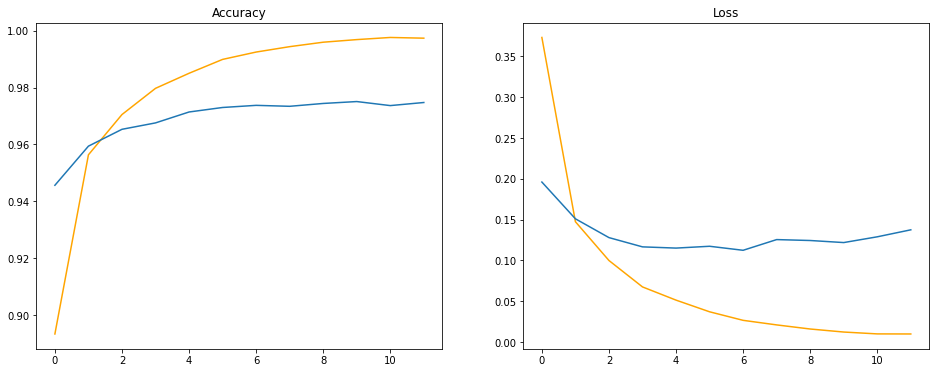

In [144]:
# plot learning curves for metric and loss
fig, axes = plt.subplots(1, 2, figsize=(16,6))
axes[0].plot(history.history["accuracy"], color = "orange")
axes[0].plot(history.history["val_accuracy"])
axes[1].plot(history.history["loss"], color = "orange")
axes[1].plot(history.history["val_loss"])
axes[0].set_title('Accuracy')
axes[1].set_title('Loss')
plt.show()

In [135]:
# create confusion matrix
predictions = best_model.predict(X_valid_tr)
conf_matrix = tf.math.confusion_matrix(labels=tf.argmax(y_valid, axis=1), predictions=tf.argmax(predictions, axis=1))

375/375 [==============================] - 1s 2ms/step


<AxesSubplot:>

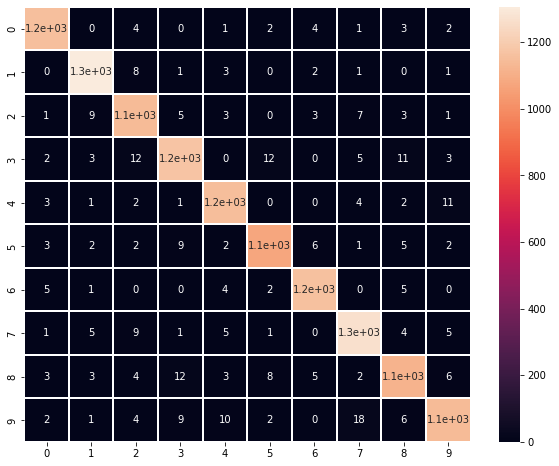

In [149]:
# plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, linecolor="white", linewidths=2)

In [143]:
# evaluate model on test set
test_results = best_model.evaluate(X_test_tr, y_test, verbose=0)

print("Testing accuracy of model is {} and loss is {}".format(test_results[1], test_results[0]))

Testing accuracy of model is 0.973800003528595 and loss is 0.10720863938331604
